In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [9]:
## 6.2.6

In [10]:
# Import the requests library.
import requests
from citipy import citipy
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350393fc9343bf41f1f18f4534f41836


In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed
    
    
  
   
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | turukhansk
Processing Record 6 of Set 1 | tabou
Processing Record 7 of Set 1 | banepa
Processing Record 8 of Set 1 | chala
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | lerwick
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | cambridge
Processing Record 16 of Set 1 | scarborough
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | jalu
Processing Record 22 of Set 1 | tecoanapa
Processing Record 2

Processing Record 35 of Set 4 | nikolskoye
Processing Record 36 of Set 4 | mahebourg
Processing Record 37 of Set 4 | namatanai
Processing Record 38 of Set 4 | paradwip
City not found. Skipping...
Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | rayong
Processing Record 41 of Set 4 | pekalongan
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | riberalta
Processing Record 45 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 46 of Set 4 | tulum
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | yakuplu
Processing Record 49 of Set 4 | porto novo
Processing Record 50 of Set 4 | zhezkazgan
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | hondo
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 | vargem grande
Processing Record 7 of Set 5

Processing Record 21 of Set 8 | hami
Processing Record 22 of Set 8 | new norfolk
Processing Record 23 of Set 8 | sinnamary
Processing Record 24 of Set 8 | maningrida
Processing Record 25 of Set 8 | avarua
Processing Record 26 of Set 8 | stulovo
Processing Record 27 of Set 8 | dwarka
Processing Record 28 of Set 8 | esperance
Processing Record 29 of Set 8 | strezhevoy
Processing Record 30 of Set 8 | manggar
Processing Record 31 of Set 8 | hovd
Processing Record 32 of Set 8 | port augusta
Processing Record 33 of Set 8 | ammon
Processing Record 34 of Set 8 | bourail
Processing Record 35 of Set 8 | yar-sale
Processing Record 36 of Set 8 | libano
Processing Record 37 of Set 8 | burkhala
City not found. Skipping...
Processing Record 38 of Set 8 | baykit
Processing Record 39 of Set 8 | grindavik
Processing Record 40 of Set 8 | sechura
Processing Record 41 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 8 | juneau
Processing Record 43 of Set 8 | chagda
City not fo

Processing Record 8 of Set 12 | rio grande
Processing Record 9 of Set 12 | erzin
Processing Record 10 of Set 12 | bereda
Processing Record 11 of Set 12 | wajima
Processing Record 12 of Set 12 | bagn
Processing Record 13 of Set 12 | jiamusi
Processing Record 14 of Set 12 | luau
Processing Record 15 of Set 12 | krasnyy chikoy
Processing Record 16 of Set 12 | meyungs
City not found. Skipping...
Processing Record 17 of Set 12 | okhotsk
Processing Record 18 of Set 12 | unye
City not found. Skipping...
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | bakel
Processing Record 21 of Set 12 | saint-georges
Processing Record 22 of Set 12 | atambua
Processing Record 23 of Set 12 | koslan
Processing Record 24 of Set 12 | svetlogorsk
Processing Record 25 of Set 12 | saint anthony
Processing Record 26 of Set 12 | coos bay
Processing Record 27 of Set 12 | ambikapur
Processing Record 28 of Set 12 | tomohon
Processing Record 29 of Set 12 | kailua
Processing Record 30 of Set 12 

In [20]:
len(city_data)

535

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,56.82,41,40,3.44,AR,2021-12-28 20:31:49
1,Rikitea,-23.1203,-134.9692,78.26,79,25,14.41,PF,2021-12-28 20:31:49
2,Constitucion,-35.3333,-72.4167,65.97,78,34,7.16,CL,2021-12-28 20:31:50
3,Vila Velha,-20.3297,-40.2925,87.75,71,40,10.00,BR,2021-12-28 20:31:50
4,Turukhansk,65.8167,87.9833,4.32,93,100,14.14,RU,2021-12-28 20:31:51
5,Tabou,4.4230,-7.3528,80.58,83,60,7.09,CI,2021-12-28 20:31:51
6,Banepa,27.6298,85.5214,48.52,93,75,2.30,NP,2021-12-28 20:31:51
7,Chala,-7.5833,31.2667,59.70,80,98,2.08,TZ,2021-12-28 20:31:52
8,Kapaa,22.0752,-159.3190,77.32,76,75,4.00,US,2021-12-28 20:31:52
9,Port Elizabeth,-33.9180,25.5701,66.09,82,0,6.91,ZA,2021-12-28 20:27:12


In [17]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-12-28 20:31:49,-54.8000,-68.3000,56.82,41,40,3.44
1,Rikitea,PF,2021-12-28 20:31:49,-23.1203,-134.9692,78.26,79,25,14.41
2,Constitucion,CL,2021-12-28 20:31:50,-35.3333,-72.4167,65.97,78,34,7.16
3,Vila Velha,BR,2021-12-28 20:31:50,-20.3297,-40.2925,87.75,71,40,10.00
4,Turukhansk,RU,2021-12-28 20:31:51,65.8167,87.9833,4.32,93,100,14.14
5,Tabou,CI,2021-12-28 20:31:51,4.4230,-7.3528,80.58,83,60,7.09
6,Banepa,NP,2021-12-28 20:31:51,27.6298,85.5214,48.52,93,75,2.30
7,Chala,TZ,2021-12-28 20:31:52,-7.5833,31.2667,59.70,80,98,2.08
8,Kapaa,US,2021-12-28 20:31:52,22.0752,-159.3190,77.32,76,75,4.00
9,Port Elizabeth,ZA,2021-12-28 20:27:12,-33.9180,25.5701,66.09,82,0,6.91


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

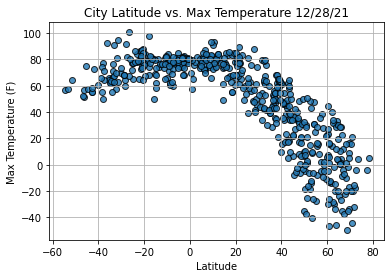

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

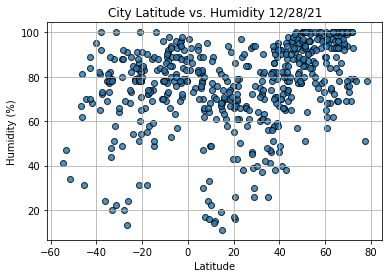

In [24]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

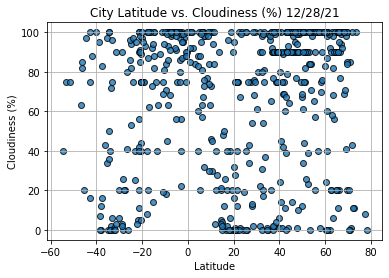

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

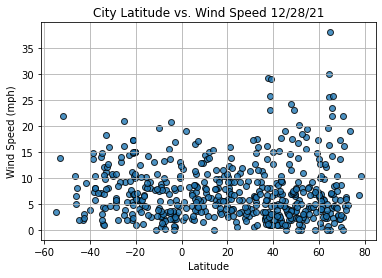

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()